# Taller 6

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Consideremos el siguiente modelo:
* $Y~|~\theta_1,\theta_2\sim N\left(\frac{\theta_1+\theta_2}{2}, 1\right)$
* $\theta_1, \theta_2 \sim N(0,1)$
y entonces tendremos que:
$$f(\theta_1, \theta_2 ~|~ y) \propto \exp\left(-\frac{1}{2} \left\{\theta_1^2 \frac{5}{4} + \theta_2^2 \frac{5}{4} + \frac{\theta_1\theta_2}{2} - (\theta_1 + \theta_2)y\right\}\right)$$

Simule la densidad anterior usando los siguientes algoritmos:
* Algoritmo MALA.
* Metropolis-Hasting con paseo aleatorio (normal).

Pruebe con distintos valores de $\sigma^2$ (la varianza de las distribuciones instrumentales) hasta obtener un valor que optimice la convergencia.

Compare la velocidad de convergencia de los algoritmos anteriores.

_Solución:_ Definimos la densidad objetivo.

In [51]:
sqrt_n = 200
xx = np.linspace(-3,3,sqrt_n)
X, Y = np.meshgrid(xx,xx)
points = np.column_stack((X.flatten(), Y.flatten())) #Ordenados de izq a der y de abajo hacia arriba

In [49]:
def f_cond(x,y):
    t_1, t_2 = x
    return np.exp(-1/2*(5*t_1**2/4 + 5*t_2**2/4 + t_1*t_2 / 2 - (t_1 + t_2)*y))

In [30]:
f = lambda x: f_cond(x,1)

Implementamos el algoritmo MALA.

In [ ]:
def MALA(f,g,x,h=0.1,N=1_000):
    return

Implementamos el algoritmo Metropolis-Hastings con paseo aleatorio.

In [31]:
g = lambda x : x + np.random.multivariate_normal([0,0], [[1, 0], [0, 1]])

In [32]:
def MH_p_a(f,g,x,N=1_000):
    '''
    Implementación del algoritmo Metropolis-Hastings con paseo aleatorio
    '''
    L = np.array([x])
    for _ in range(N):
        y = g(L[-1])
        u = np.random.uniform()
        a = 0 if f(L[-1]) == 0 else min(1, f(y) / f(L[-1]))
        L = np.vstack((L, y)) if u < a else np.vstack((L, L[-1]))
    return L

In [68]:
%%time
N = 100_000
x0 = np.array([-0.42819724,  1.38898425])
L  = MH_p_a(f,g,x0,N)

CPU times: total: 14.6 s
Wall time: 33.7 s


In [81]:
F = np.apply_along_axis(f, axis=1, arr=points)

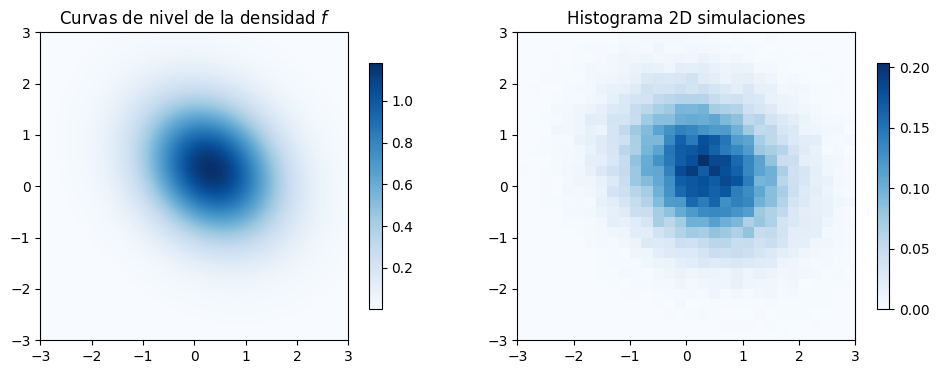

In [93]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.imshow(F.reshape(sqrt_n,sqrt_n),
           origin = 'lower',
           cmap = 'Blues',
           extent = [-3,3,-3,3])
plt.colorbar(shrink=0.8)
plt.title(r'Curvas de nivel de la densidad $f$')

plt.subplot(1,2,2)
plt.hist2d(L[:, 0], L[:, 1],
           bins = 30, cmap='Blues', density = True,
           range=[[-3, 3], [-3, 3]])
plt.colorbar(shrink=0.8)
plt.title('Histograma 2D simulaciones');